# 4.10: Coding Etiquette & Excel Reporting

### This notebook contains the following-

#### 1. Import libraries and data exported from 4.9

#### 2. Address security implications

#### 3. Create a regional segmentation of the data
#### - 3.1. Set up region column
#### - 3.2. Create a crosstab to compare spending habits in different regions

#### 4. Create an exclusion flag to exclude low-activity customers from the data

#### 5. Create profiling variables
#### - 5.1. Age
#### - 5.2 Income
#### - 5.3 Number of Dependents

#### 6. Visualizations to show distributions of profiles
#### - 6.1. Age Groups
#### - 6.2. Income Groups
#### - 6.3. Customers w/ Dependents

#### 7. Aggregate max, min, & mean variables on customer-profile level for usage frequency and expenditure
#### - 7.1. Age Group
#### - 7.2. Income Group
#### - 7.3. Dependents Category


#### 8. Compare customer profiles w/ regions & departments. Identify any links. Customers may demonstrate different behaviors across regions, which could make this information important.
#### - 8.1 Profile by Region
#### - 8.2 Profile by Department Sales
#### 8.3. Profiles by Frequency

#### 9. Visualizations

#### 10. Export Final Data Set

## 1. Import libraries and data exported from 4.9

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#creating path
path = r'C:\Users\shrav\_Data_Analysis_CF\career_foundry\31-05-2020_InstacartBasketAnalysis'

In [3]:
# Import most up-to-date project data

instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_customers.pkl'))

In [4]:
instacart.shape

(32404859, 34)

In [5]:
#Checking dataframe
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,First_name,Last_name,Gender,State,Age,Date_joined,number_of_dependants,Marital_status,Income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


## 2. Address security implications

In [6]:
#  Display all the columns of a DataFrame

pd.options.display.max_columns = None

In [7]:
# Check data for reminder of contents
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,First_name,Last_name,Gender,State,Age,Date_joined,number_of_dependants,Marital_status,Income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low_spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,False,11,1,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low_spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [8]:
#dropping first and last name-First name and last name should be dropped due to PII

instacart.drop(['First_name', 'Last_name'], axis=1, inplace = True)

In [9]:
#checking column names
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'Gender', 'State', 'Age', 'Date_joined', 'number_of_dependants',
       'Marital_status', 'Income', '_merge'],
      dtype='object')

## 3. Create a regional segmentation of the data

### 3.1. Set up region column:

In [10]:
# Create Region column - organize by state and region

northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]

In [11]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [12]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [13]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
# Create region columns
instacart.loc[instacart['State'].isin(northeast_region), 'region'] = 'Northeast'

In [15]:
instacart.loc[instacart['State'].isin(midwest_region), 'region'] = 'Midwest'

In [16]:
instacart.loc[instacart['State'].isin(south_region), 'region'] = 'South'

In [17]:
instacart.loc[instacart['State'].isin(west_region), 'region'] = 'West'

In [19]:
# Checking length of new column

len(instacart['region'])

32404859

In [20]:
# Checking data
instacart['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## 3.2. Creating a crosstab to compare spending habits in different U.S. regions:

In [21]:
# create a crosstab between 'region' and 'spending_flag'

region_spending_crosstab = pd.crosstab(instacart['region'], instacart['spender_flag'], dropna = False)

In [22]:
# Could save to clipboard and open in Excel, but it should be a small table that can be viewed here
region_spending_crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### Spending habits are very similar between regions when looking at the proportions of customers in each region. The greatest proportion of 'High spender' customers was 2.10% in the South, whereas the lowest proportion of 'High spender' customers was 1.93% in the Northeast.


## 4. Create an exclusion flag for low-activity customers and export this sample.

In [23]:
# Exclude customers w/ max_order less than 5 
instacart.loc[instacart['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [24]:
# Keep customers where max_order is greater than or equal to 5
instacart.loc[instacart['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [25]:
# Check table
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date_joined,number_of_dependants,Marital_status,Income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low_spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Exclude
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,False,11,1,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low_spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Exclude


In [26]:
# Check frequencies
instacart['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [27]:
# Check exclusion flag using crosstab
exclusion_flag_check = pd.crosstab(instacart['exclusion_flag'], instacart['max_order'], dropna = False)

In [28]:
exclusion_flag_check.to_clipboard()

#### The exclusion flag was verified in Excel - All rows where `max_order` is less than 5 are marked with 'Exclude'.

In [29]:
# Create sample without 'exclude' rows called ords_prods_in
instacart = instacart[instacart['exclusion_flag'] == 'Keep']

In [30]:
# Check sample
instacart.shape

(30964564, 34)

#### Since the number of rows in the dataset matches the frequency of "Keep" entries in the "Exclusion_Flag" column, we can confidently conclude that this sample contains only the relevant data, excluding any rows related to customers who have made fewer than 5 orders. This ensures that the dataset focuses solely on customers who are active users of the platform, providing a more accurate representation for analysis.

In [31]:
# Export Sample
instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_sample.pkl'))

## 5. Create profiling variables

### 5.1. Age


#### The age categories are subjective, but based on standard ranges. Young adult =< 25,  Adult 25-45,Older Adult 45-65  Senior 65+

In [32]:
#Creating age profiling variable

instacart.loc[instacart['Age']<=25, 'age_group']='Young Adult'
instacart.loc[(instacart['Age']>25)&(instacart['Age']<45), 'age_group']='Adult'
instacart.loc[(instacart['Age']>=45)&(instacart['Age']<65), 'age_group']='Older Adult'
instacart.loc[instacart['Age']>=65, 'age_group']='Senior'

In [33]:
# Check frequency of age_group and ensure no NaNs
instacart['age_group'].value_counts(dropna = False)

age_group
Older Adult    9690051
Adult          9214451
Senior         8195544
Young Adult    3864518
Name: count, dtype: int64

In [34]:
instacart.dropna()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date_joined,number_of_dependants,Marital_status,Income,_merge,region,exclusion_flag,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep,Senior
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,Keep,Older Adult
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low_spender,20.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,Keep,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404853,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,10,4,14,30.0,False,17,0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,8.814508,Low_spender,4.0,Frequent customer,Female,Alabama,62,10/25/2019,1,married,128072,both,South,Keep,Older Adult
32404854,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,2,0,9,5.0,False,27,0,Mid-range product,Busiest day,Busiest days,Most orders,6,New customer,8.220313,Low_spender,7.0,Frequent customer,Female,Rhode Island,47,9/13/2017,1,married,166687,both,Northeast,Keep,Older Adult
32404856,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,15.0,False,12,0,Mid-range product,Regularly busy,Slowest days,Average orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent customer,Female,Michigan,57,3/21/2018,1,married,100649,both,Midwest,Keep,Older Adult
32404857,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,5.0,False,11,1,Mid-range product,Regularly busy,Slowest days,Most orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent customer,Female,Michigan,57,3/21/2018,1,married,100649,both,Midwest,Keep,Older Adult


In [36]:
# Aggregate for age group usage frequency

instacart.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                    10.815262  0.0  30.0
Older Adult              10.825714  0.0  30.0
Senior                   10.791788  0.0  30.0
Young Adult              10.799071  0.0  30.0

In [37]:
# Aggregate for age group expenditure

instacart.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        11.786432  1.0  99999.0
Older Adult  12.112030  1.0  99999.0
Senior       11.757768  1.0  99999.0
Young Adult  12.209359  1.0  99999.0

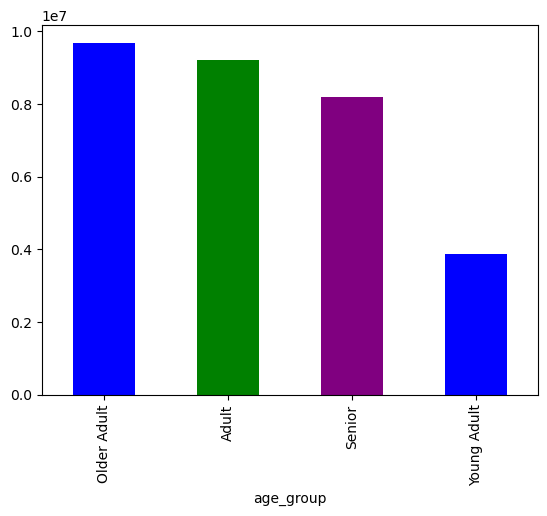

In [38]:
# Age profile visualization

bar=instacart['age_group'].value_counts().plot.bar(color =['blue', 'green', 'purple'])

In [39]:
# Export Bar Chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_agegroup.png'))

### 5.2. Income

#### Categorize customers into income categories: low, middle, & high income groups based on standard considerations of US incomes. 

In [40]:
# Ensure you modify the DataFrame directly
instacart.loc[instacart['Income'] <= 50000, 'Income_group'] = 'Low'
instacart.loc[(instacart['Income'] > 50000) & (instacart['Income'] <= 100000), 'Income_group'] = 'Middle'
instacart.loc[instacart['Income'] > 100000, 'Income_group'] = 'High'


In [41]:
# Check frequency of income_group and ensure no NaNs
instacart['Income_group'].value_counts(dropna = False)

Income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

In [43]:
# Aggregate for income group order frequency

instacart.groupby('Income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
Income_group                                  
High                      10.769663  0.0  30.0
Low                       11.175808  0.0  30.0
Middle                    10.762110  0.0  30.0

In [44]:
# Aggregate for income group expenditure

instacart.groupby('Income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
Income_group                         
High          16.461733  1.0  99999.0
Low            6.707347  1.0     25.0
Middle         8.442726  1.0  99999.0

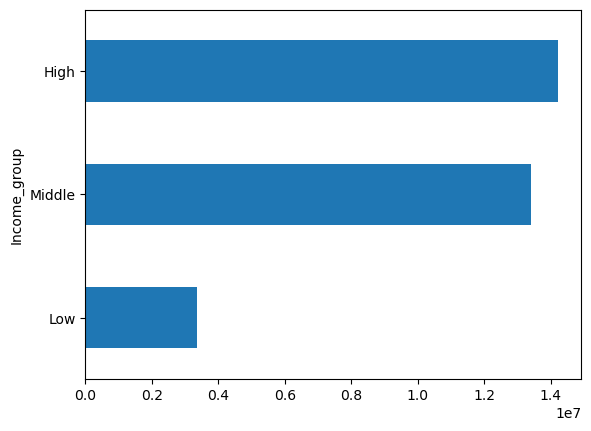

In [46]:
# Income profile visualization

bar2 = instacart['Income_group'].value_counts().sort_values().plot.barh()

In [47]:
# Export Bar Chart

bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_incomegroup.png'))

### 5.3. Number of Dependants

#### Divide data into customers with dependents and customers without dependents

In [48]:
instacart.loc[instacart['number_of_dependants'] == 0, 'dependants_flag'] = 'No Dependants'


In [49]:
# Update 'dependents_flag' where 'number_of_dependants' is greater than 0
instacart.loc[instacart['number_of_dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

# Update 'dependents_flag' where 'nunber_of_dependants' is 0
instacart.loc[instacart['number_of_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

In [50]:
#Check data
instacart['dependants_flag'].value_counts(dropna = False)

dependants_flag
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

In [55]:
# Aggregate for dependent group order frequency

instacart.groupby('dependants_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dependants_flag                                  
Has Dependants               10.816416  0.0  30.0
No Dependants                10.791951  0.0  30.0

In [56]:
# Aggregate for dependent group expenditure

instacart.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependants_flag                         
Has Dependants   11.877157  1.0  99999.0
No Dependants    12.102657  1.0  99999.0

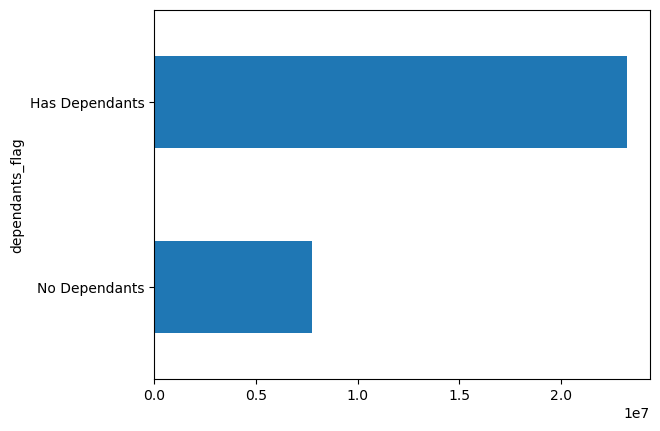

In [59]:
# Number of dependent group profile visualization

bar10 = instacart['dependants_flag'].value_counts().sort_values().plot.barh()

In [60]:
# Export Bar Chart

bar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependentgroup.png'))

## 6. Visualizations to show distributions of profiles

In [61]:
print(instacart.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'Gender', 'State', 'Age', 'Date_joined', 'number_of_dependants',
       'Marital_status', 'Income', '_merge', 'region', 'exclusion_flag',
       'age_group', 'Income_group', 'dependants_flag'],
      dtype='object')


In [62]:
# Create a unique user_id sample and take relevant columns

user_sample = instacart[['user_id', 'age_group', 'Income_group', 'dependants_flag', 'region', 'loyalty_flag']]

In [63]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [64]:
# Check data
user_sample

,user_id,age_group,Income_group,dependants_flag,region,loyalty_flag
0,138,Senior,Low,Has Dependants,Midwest,Regular customer
2,709,Senior,High,Has Dependants,Northeast,New customer
5,777,Older Adult,Middle,Has Dependants,West,Regular customer
6,825,Young Adult,Low,Has Dependants,South,New customer
7,910,Senior,Low,No Dependants,South,Regular customer
...,...,...,...,...,...,...
30422584,169498,Older Adult,High,Has Dependants,Northeast,New customer
30722969,28213,Adult,High,Has Dependants,South,New customer
31448195,18512,Senior,Middle,No Dependants,Midwest,New customer
31925360,31628,Adult,Low,Has Dependants,South,New customer


### loyalty_flag = {'New': 1, 'Regular': 2, 'Loyal': 3}

## 6.1. Age Groups

In [65]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [66]:
## Create age_group counts table
age_group_counts = user_sample['age_group'].value_counts()

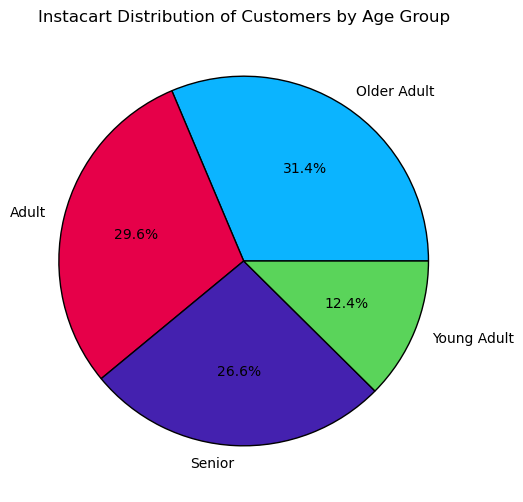

In [67]:
# Pie Chart
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to 1 d.p
        colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Age Group') # title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

## 6.2. Income Groups

In [68]:
## Create a table of income_group counts
income_group_counts = user_sample['Income_group'].value_counts()

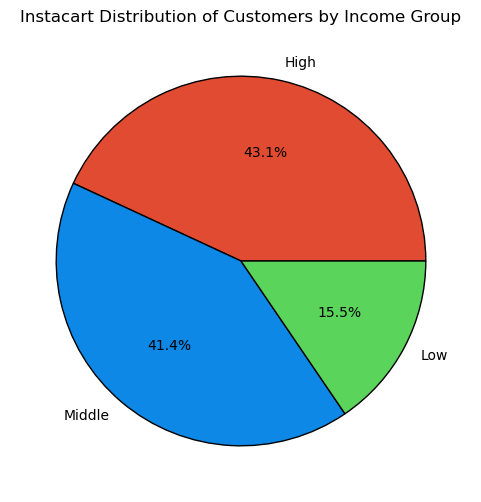

In [69]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',
        colors = ['#e14b31', '#0d88e6', '#5ad45a'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Distribution of Customers by Income Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches = 'tight')
plt.show()

## 6.3. Dependants

In [70]:
# create a table of dependents_flag counts
dependants_flag_counts = user_sample['dependants_flag'].value_counts()

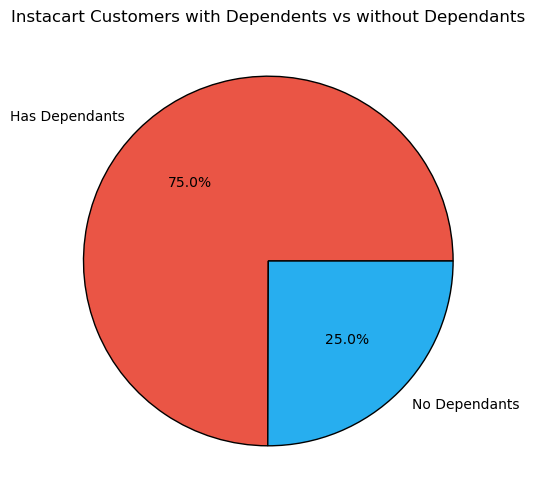

In [71]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(dependants_flag_counts, 
        labels = dependants_flag_counts.index, 
        autopct='%.1f%%', 
        colors = ['#ea5545', '#27aeef'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Customers with Dependents vs without Dependants')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependants_pie.png'), bbox_inches = 'tight')
plt.show()

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### Usage frequency is analyzed based on days since prior order & expenditure based on prices columns. For accuracy, aggregate the data from the instacart DataFrame so that each row represents a single order. This approach prevents averages from being skewed by customer orders comprising many items.

In [72]:
# An aggregated subset of data with 'prices' column as the total cost of each order:
orders_subset = instacart.groupby(['user_id', 'age_group', 'Income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [73]:
# Rename 'prices' to 'order_total'
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [74]:
# Check subset
orders_subset

,user_id,age_group,Income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,order_total
0,1,Adult,Low,Has Dependants,New customer,South,2,15.0,35.4
1,1,Adult,Low,Has Dependants,New customer,South,3,21.0,28.2
2,1,Adult,Low,Has Dependants,New customer,South,4,29.0,26.0
3,1,Adult,Low,Has Dependants,New customer,South,5,28.0,57.0
4,1,Adult,Low,Has Dependants,New customer,South,6,19.0,25.0
...,...,...,...,...,...,...,...,...,...
2901748,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,30,4.0,6.7
2901749,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,31,8.0,25.1
2901750,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,32,5.0,44.4
2901751,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,33,6.0,41.2


## 7.1. Aggregations by Age Group

In [75]:
# max, min, mean by age category
aggregations_by_age_cat = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_cat

days_since_prior_order                  order_total              \
                               min       mean   max         min        mean   
age_group                                                                     
Adult                          0.0  10.403753  30.0         1.0  119.309617   
Older Adult                    0.0  10.382166  30.0         1.0  122.515094   
Senior                         0.0  10.372165  30.0         1.0  117.902487   
Young Adult                    0.0  10.380577  30.0         1.0  123.717587   

                       
                  max  
age_group              
Adult        100384.5  
Older Adult  100452.9  
Senior       100330.2  
Young Adult  100265.6

## 7.2. Aggregations by Income Group

In [76]:
# max, min, mean by age category
aggregations_by_income_cat = orders_subset.groupby('Income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_income_cat

days_since_prior_order                  order_total              \
                                min       mean   max         min        mean   
Income_group                                                                   
High                            0.0  10.260991  30.0         1.0  173.328575   
Low                             0.0  11.070341  30.0         1.0   52.673028   
Middle                          0.0  10.290003  30.0         1.0   87.647632   

                        
                   max  
Income_group            
High          100452.9  
Low              875.0  
Middle        100264.7

#### Lower income customers spend less on average and shop very slightly less often

#### All age groups tend to shop and spend with similar frequency

##  7.3. Aggregations by Dependants Category


In [77]:
# max, min, mean by dependants category
aggregations_by_dependants_cat = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_dependants_cat

days_since_prior_order                  order_total  \
                                   min       mean   max         min   
dependants_flag                                                       
Has Dependants                     0.0  10.388225  30.0         1.0   
No Dependants                      0.0  10.378169  30.0         1.0   

                                       
                       mean       max  
dependants_flag                        
Has Dependants   120.027807  100452.9  
No Dependants    121.866791  100384.5

#### Whether or not a customer has dependents doesn't seem to make a substantial difference to shopping or spending

## 8. Compare customer profiles with regions and departments and identify any links? 

#### The behaviors to be examined include frequency/loyalty, product_prices, and order_totals. Customer profile variables to be compared across regions and department sales

In [81]:
# Get names of each department back into the data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [82]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [83]:
# Turning department dataframe into data dictionary

zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [84]:
# Connect department names to department_id in dataframe

instacart['department'] = instacart['department_id'].map(data_dict)

In [86]:
# Checking dataframe

instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,Gender,State,Age,Date_joined,number_of_dependants,Marital_status,Income,_merge,region,exclusion_flag,age_group,Income_group,dependants_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep,Senior,High,Has Dependants,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,Keep,Older Adult,Middle,Has Dependants,snacks
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low_spender,20.0,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,Keep,Young Adult,Low,Has Dependants,snacks


## Department-Baby Profile

In [88]:
# Creating baby department profiling variable

instacart['baby_status'] = [1 if x == 'babies' else 0 for x in instacart['department']]
instacart['baby_status'] = instacart.groupby(['user_id'])['baby_status'].transform(np.max)

C:\Users\shrav\AppData\Local\Temp\ipykernel_4148\13078424.py:4: FutureWarning: The provided callable <function max at 0x000002243D718900> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  instacart['baby_status'] = instacart.groupby(['user_id'])['baby_status'].transform(np.max)


In [90]:
# Checking new variable

instacart['baby_status'].value_counts(dropna=False)

baby_status
0    21154311
1     9810253
Name: count, dtype: int64

In [92]:
# Aggregatefor baby status bracket order frequency

instacart.groupby('baby_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
baby_status                                  
0                        11.497240  0.0  30.0
1                         9.358558  0.0  30.0

In [ ]:
# Check sample
instacart.shape

In [93]:
# Aggregate for baby status bracket expenditure

instacart.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})


prices              
                  mean  min      max
baby_status                         
0            12.480604  1.0  99999.0
1            10.753821  1.0  99999.0

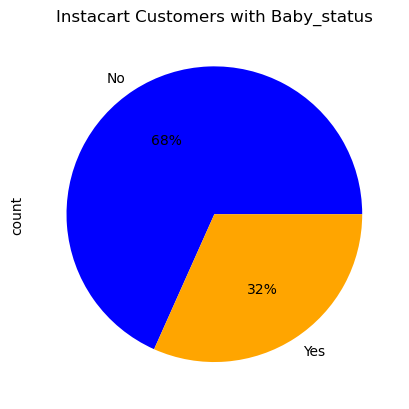

In [176]:
# Baby Status Visualization

pie = instacart['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','orange'])

plt.title('Instacart Customers with Baby_status')

# Export pie chart

pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pei_babystatus.png'))

## Department -Alcohol Profile

In [99]:
# Creating alcohol profiling variable

instacart['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in instacart['department']]
instacart['alcohol_status'] = instacart.groupby(['user_id'])['alcohol_status'].transform(np.max)

C:\Users\shrav\AppData\Local\Temp\ipykernel_4148\1991112230.py:4: FutureWarning: The provided callable <function max at 0x000002243D718900> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  instacart['alcohol_status'] = instacart.groupby(['user_id'])['alcohol_status'].transform(np.max)


In [100]:
# Checking new variable

instacart['alcohol_status'].value_counts(dropna=False)

alcohol_status
0    28634074
1     2330490
Name: count, dtype: int64

In [101]:
# Aggregate for alcohol_status bracket order frequency

instacart.groupby('alcohol_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
alcohol_status                                  
0                           10.822711  0.0  30.0
1                           10.657625  0.0  30.0

In [102]:
# Aggregate for alcohol_status bracket expenditure

instacart.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
alcohol_status                         
0               10.979561  1.0  99999.0
1               23.654561  1.0  99999.0

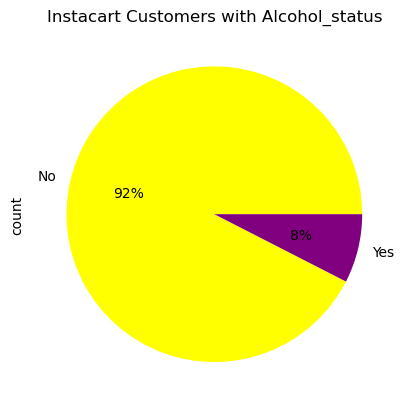

In [177]:
# Alcohol_status visualization

pie2 = instacart['alcohol_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['yellow','purple'])

plt.title('Instacart Customers with Alcohol_status')

# Export alcohol_status pie chart

pie2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_alcoholstatus.png'))

## Department -Pet Profile

In [105]:
#Creating pet profiling variable: 
#bought pet supplies(1) 
#didn't buy pet supplies (0)

instacart['pet_status'] = [1 if x == 'pets' else 0 for x in instacart['department']]
instacart['pet_status']=instacart.groupby(['user_id'])['pet_status'].transform(np.max)

C:\Users\shrav\AppData\Local\Temp\ipykernel_4148\4072593315.py:6: FutureWarning: The provided callable <function max at 0x000002243D718900> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  instacart['pet_status']=instacart.groupby(['user_id'])['pet_status'].transform(np.max)


In [106]:
# Checking new variable

instacart['pet_status'].value_counts(dropna=False)

pet_status
0    27513213
1     3451351
Name: count, dtype: int64

In [107]:
#Aggregating for pet_status bracket order frequency
instacart.groupby('pet_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                             mean  min   max
pet_status                                  
0                       10.889796  0.0  30.0
1                       10.182021  0.0  30.0

In [108]:
#Aggregating for pet_status bracket expenditure
instacart.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                 mean  min      max
pet_status                         
0           11.635643  1.0  99999.0
1           14.308121  1.0  99999.0

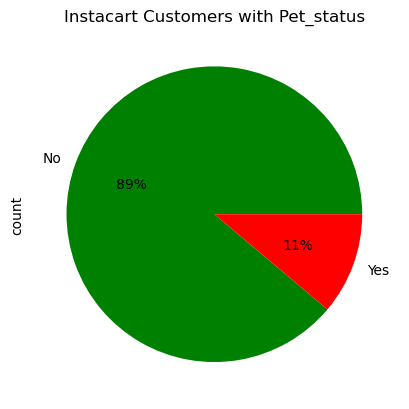

In [178]:
# Pet_status Visualization

pie3 = instacart['pet_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['green','red'])

plt.title('Instacart Customers with Pet_status')

# Export Pet_status Pie Chart

pie3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_petstatus.png'))

## 8. Compare your customer profiles with regions and departments. Produce suitable charts to illustrate your reports and export them in your project folder.

## 8.1. Profile by Region

## 8.1.1. Income Groups

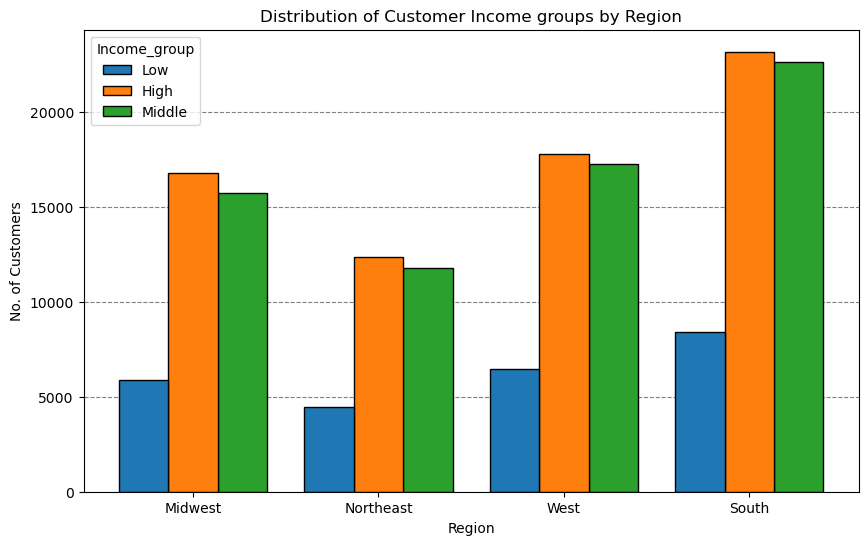

In [111]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='Income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [112]:
# Check above graph using crosstab
pd.crosstab(user_sample['Income_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
Income_group,,,,
High,16756,12369,23156,17799
Low,5891,4440,8403,6458
Middle,15729,11772,22634,17224


## 8.1.2. Age Groups

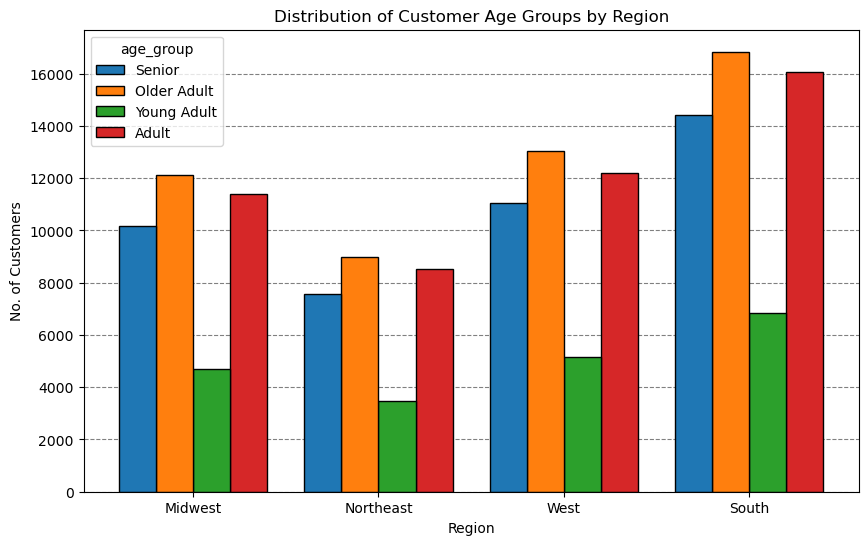

In [113]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

## 8.1.3 Department groups 

In [114]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
age_group,,,,
Adult,11379,8527,16071,12214
Older Adult,12119,9000,16839,13035
Senior,10169,7580,14433,11068
Young Adult,4709,3474,6850,5164


In [121]:
# Creating crosstab for region and department

region_dep = pd.crosstab(instacart['department'], instacart['region'], dropna = False)

In [122]:
# Checking Crosstab

region_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


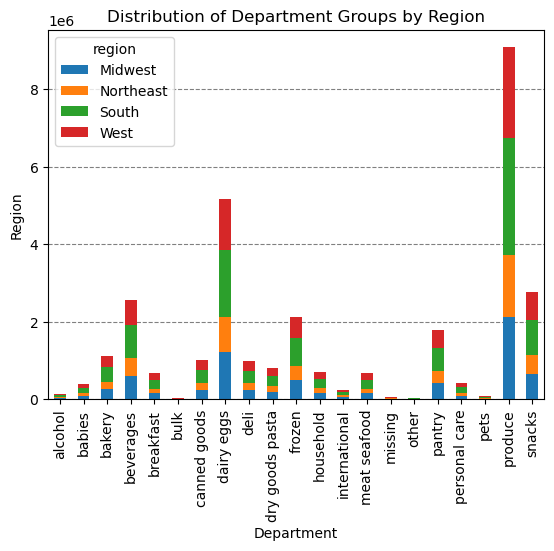

In [139]:
# Region_department Bar Chart

bar5 = region_dep.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Region')
plt.xlabel('Department')

# Exporting bar chart

bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

## 8.1.4. Dependants

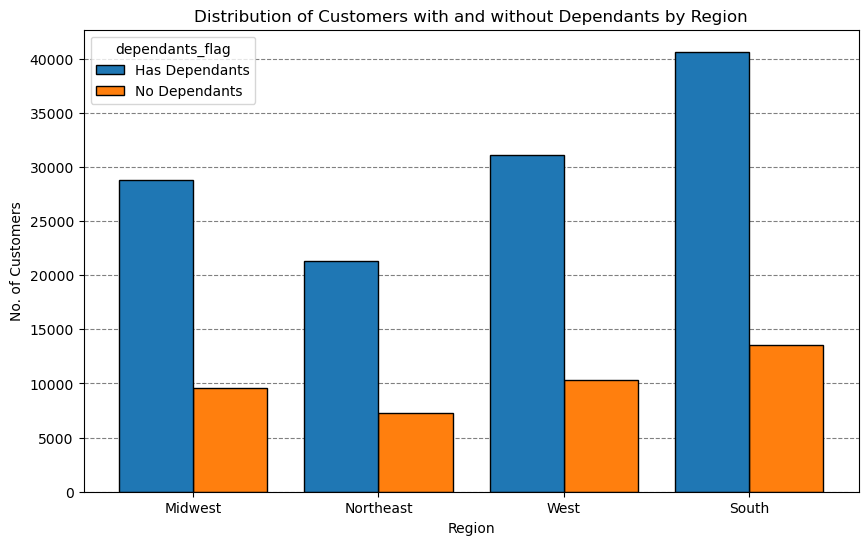

In [140]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependants by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

## 8.1.5. Price Range

In [144]:
# Creating crosstab for region and price range

region_pricerange = pd.crosstab(instacart['region'], instacart['price_range_loc'], dropna = False)


In [145]:
# Checking crosstab

region_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


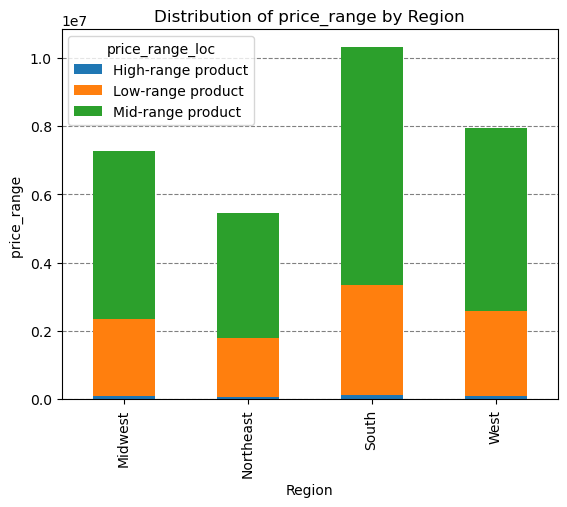

In [147]:
# Region_pricerange Bar Chart

bar6 = region_pricerange.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of price_range by Region')
plt.ylabel('price_range ')
plt.xlabel('Region')

# Exporting bar chart
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_pricerange.png'))

## 8.2. Profiles by Department Sales

## 8.2.1. Income Groups

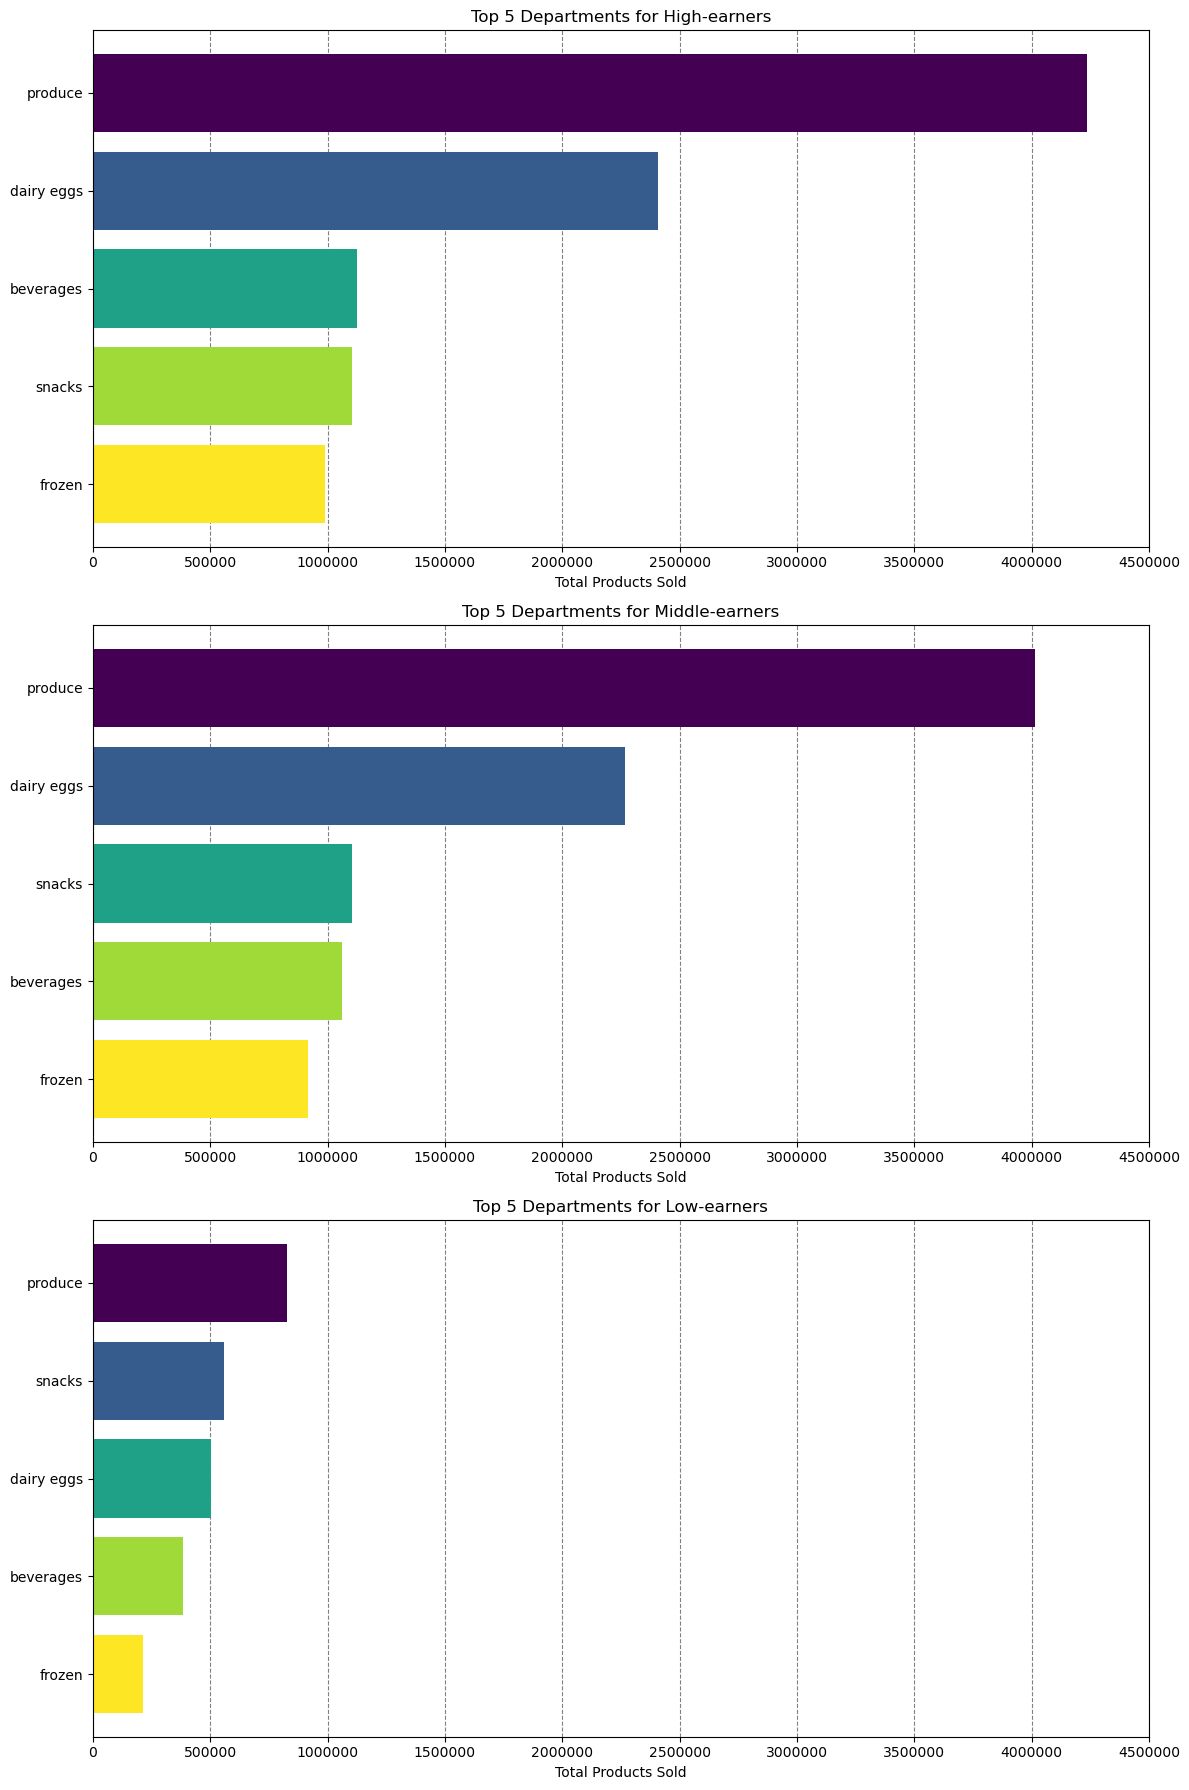

In [127]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = instacart.groupby(['Income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['Income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 2, 8))  # Sets colour palette

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']

# Iterate over each income group and create a horizontal bar chart
for i, Income_group in enumerate(desired_order):
    income_data = income_department_counts[income_department_counts['Income_group'] == Income_group].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {Income_group}-earners')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_Income_group.png'), bbox_inches = 'tight')
plt.show()

#### Note: Interesting that after "produce" the top departments differ between the income groups. Higher earners are more concerned with "dairy/eggs" whereas low-earners buy from "snacks" more often.

## 8.2.2. Age Groups

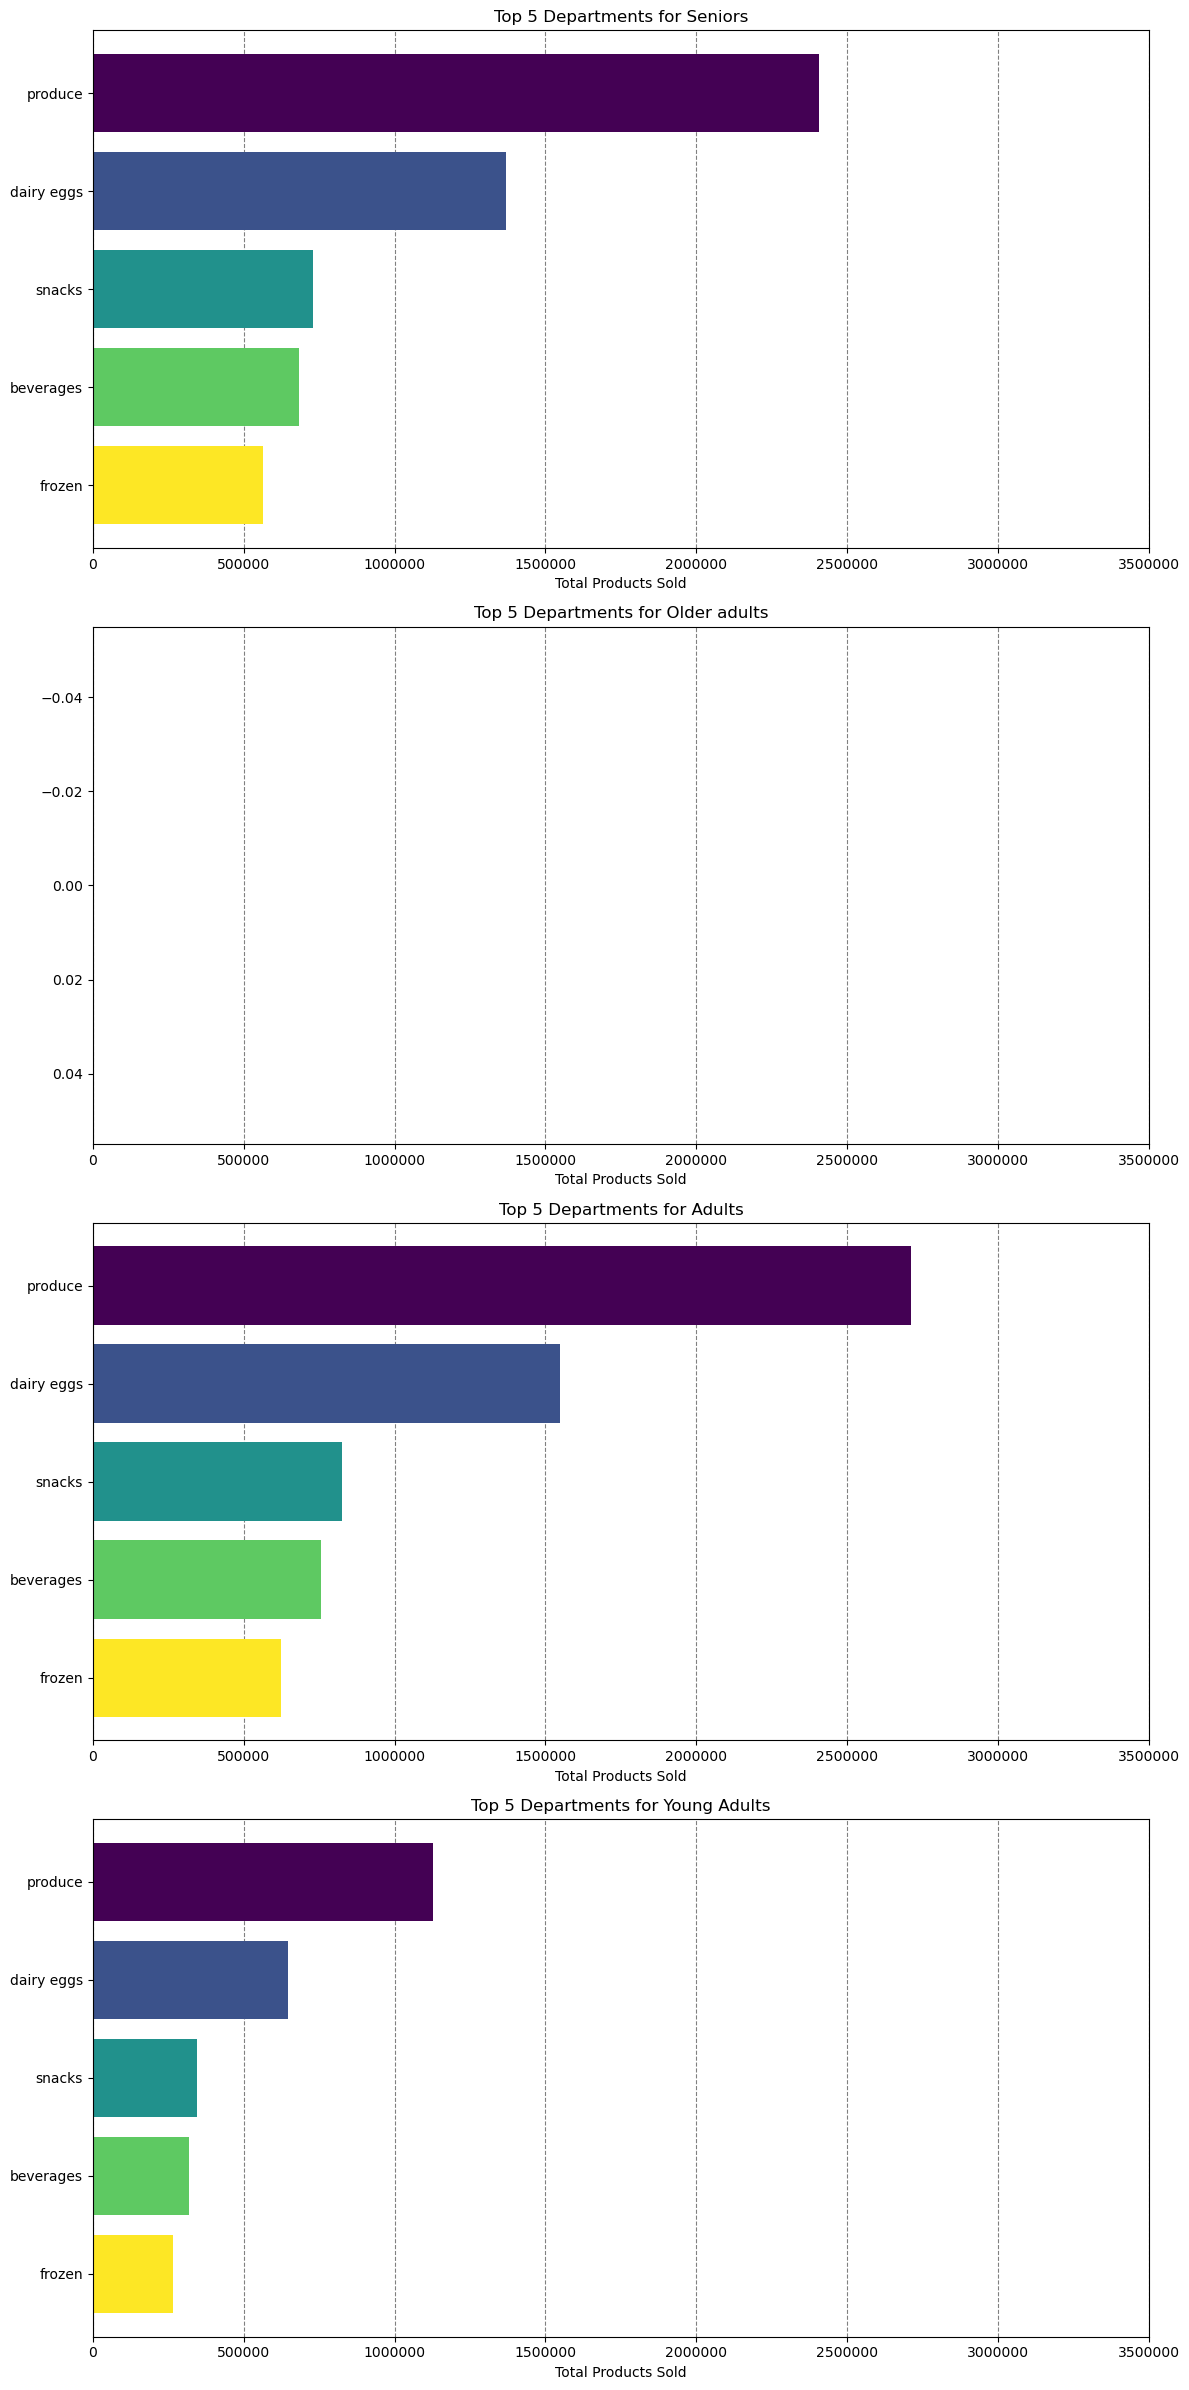

In [128]:
# Group by age_group and department, count occurrences, and sort
age_department_counts = instacart.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(4, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
desired_age_order = ['Senior', 'Older adult', 'Adult', 'Young Adult']

# Iterate over each age group and create a horizontal bar chart
for i, age_group in enumerate(desired_age_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].head(5)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 3500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_age_group.png'), bbox_inches = 'tight')
plt.show()

#### Strangely, different age groups don't show any differences between the departments they purchase the most products from.


## 8.2.3. Dependants

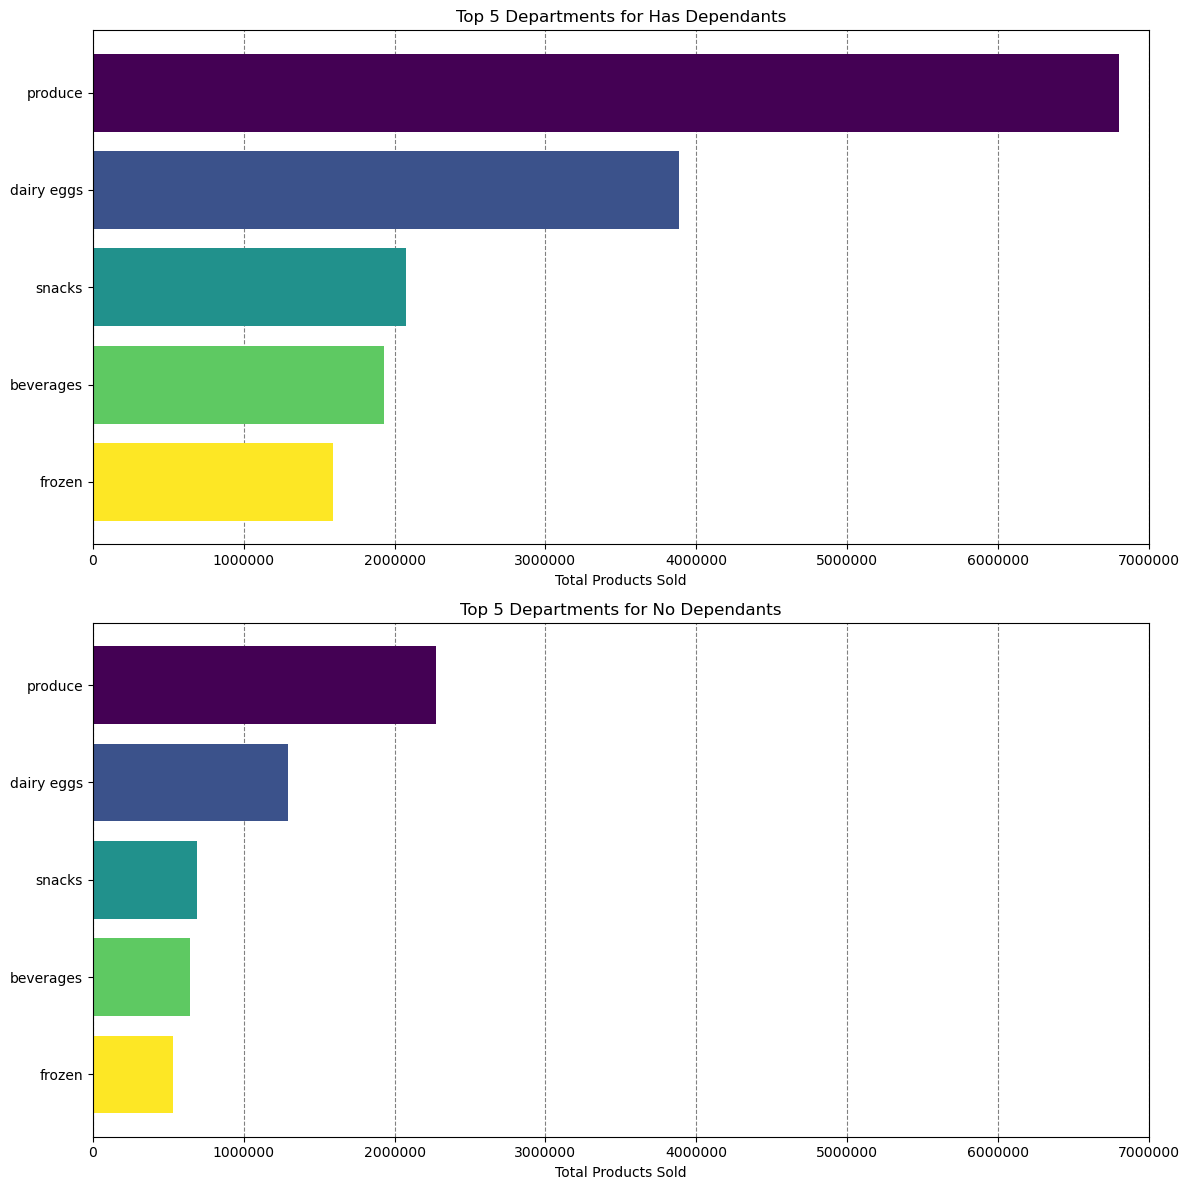

In [130]:
# Group by dependants_flag and department, count occurrences, and sort
dependants_department_counts = instacart.groupby(['dependants_flag', 'department']).size().reset_index(name='counts')
dependants_department_counts.sort_values(by=['dependants_flag', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
dependants_order = ['Has Dependants', 'No Dependants']

# Iterate over both dependants_flags and create a horizontal bar chart
for i, dependants_status in enumerate(dependants_order):
    dependants_data = dependants_department_counts[dependants_department_counts['dependants_flag'] == dependants_status].head(5)
    ax = axs[i]
    ax.barh(dependants_data['department'], dependants_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {dependants_status}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 7000000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_dependants.png'), bbox_inches = 'tight')
plt.show()

####  Surprisingly, top departments are consistent between these groups with a roughly proportional number of products purchased in each department

## 8.3. Profiles by Frequency

## 8.3.1. Income Groups

In [152]:
# Creating crosstab for income and frequency

income_freq = pd.crosstab(instacart['Income_group'], instacart['frequency_flag'], dropna = False)

In [153]:
# Checking crosstab

income_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Income_group,,,
High,9779323,1290502,3137203
Low,2199082,376138,787334
Middle,9226071,1228335,2940576


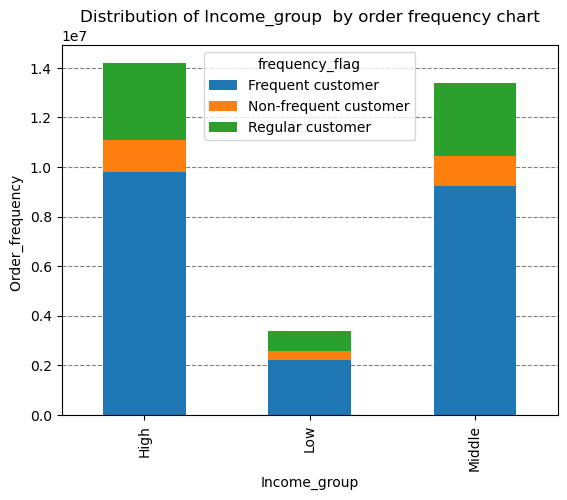

In [160]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Income_group')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_frequency.png'))

## 8.3.2. Age Groups

In [161]:
# Creating crosstab for age and frequency

age_freq = pd.crosstab(instacart['age_group'], instacart['frequency_flag'], dropna = False)

In [162]:
# Checking crosstab

age_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,6309385,848176,2056890
Older Adult,6610186,928228,2151637
Senior,5630976,760132,1804436
Young Adult,2653929,358439,852150


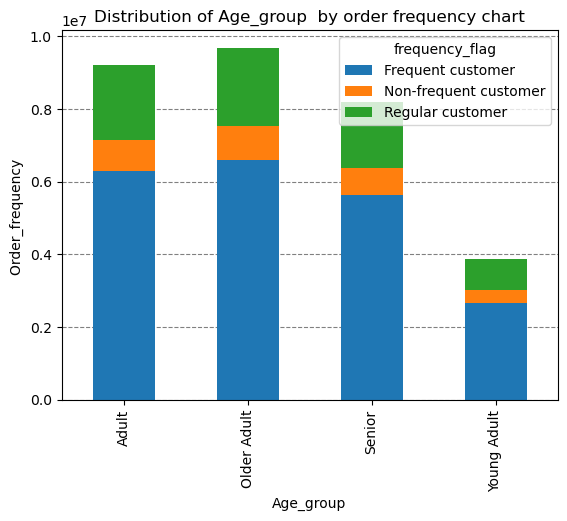

In [163]:
# Region Price Range Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Age_group  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Age_group')

# Exporting bar chart

bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_freq.png'))

## 8.3.3. Marital Status

In [165]:
# Creating crosstab for marital status and frequency

marital_freq = pd.crosstab(instacart['Marital_status'], instacart['frequency_flag'], dropna = False)

In [166]:
# Checking crosstab

marital_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Marital_status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


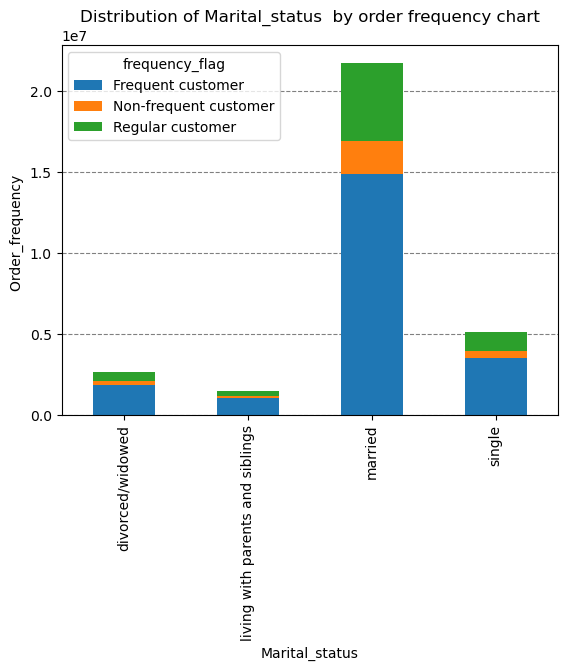

In [167]:
#Marital_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Marital_status  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Marital_status')

# Exporting bar chart

bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_freq.png'))

## 8.3.4. Departments 

In [168]:
# Creating crosstab for department and frequency
dep_freq = pd.crosstab(instacart['department'], instacart['frequency_flag'], dropna = False)

In [171]:
# Checking crosstab
dep_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,100491,13271,30865
babies,316214,25297,68881
bakery,770435,103019,247374
beverages,1756158,244136,571607
breakfast,455837,64106,150907
bulk,25087,2514,5850
canned goods,658729,108011,245334
dairy eggs,3623889,452920,1100373
deli,674588,98098,231148


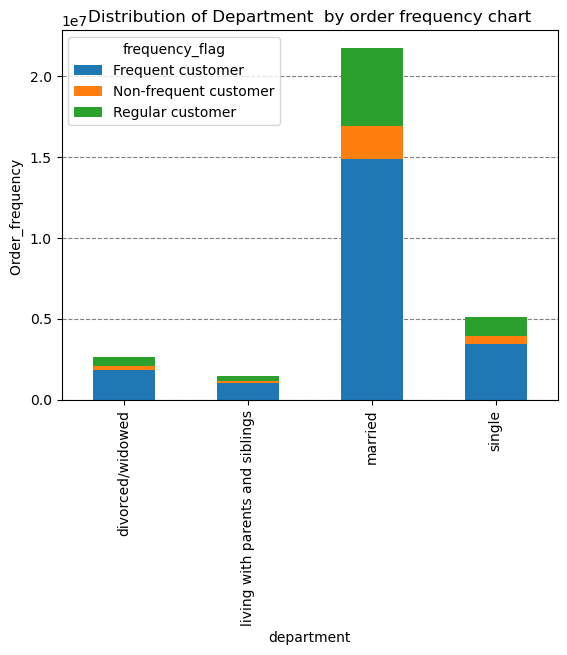

In [172]:
#dept_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('department')

# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency.png'))

## 9. Visualisations

#### All visualisations have been exported throughout the script

## 10. Export Final Data Set

In [173]:
instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_full_data.pkl'))

## Additional Analysis

### Top 10 departments for instacart

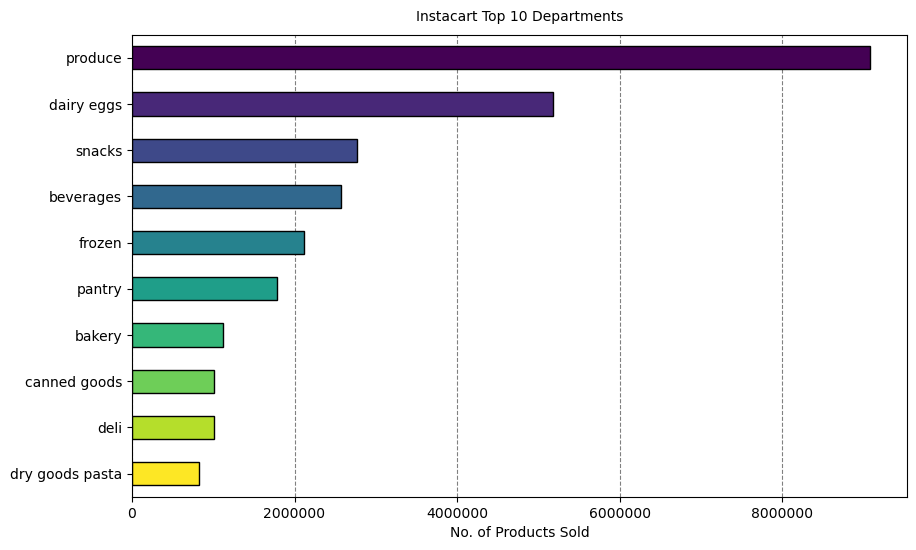

In [179]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

instacart['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Instacart_department_sales.png'), bbox_inches = 'tight')

In [180]:
# Frequency count
instacart['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

## Ordering habits based on loyalty status

In [181]:
# Compute average order_total
loyalty_order_total = orders_subset.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()

In [182]:
# Check
loyalty_order_total

,loyalty_flag,order_total
0,New customer,132.506807
1,Regular customer,128.180316
2,Loyal customer,104.231945


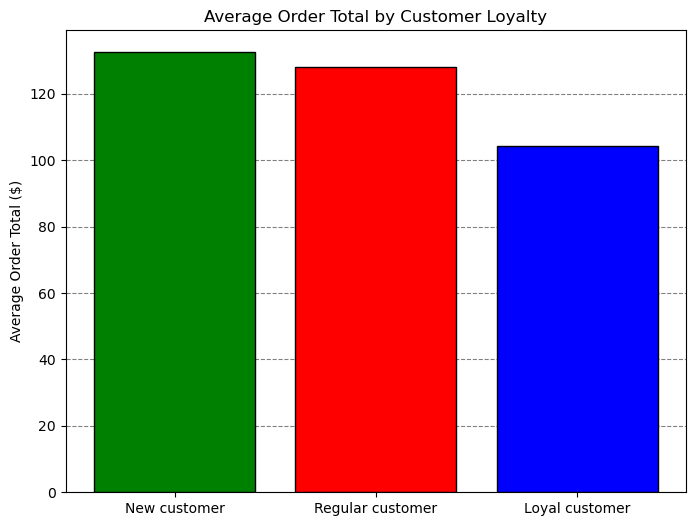

In [183]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['green', 'red', 'blue']

# Plot bars
bars = plt.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

In [185]:
# Average price of products purchased
product_avg_cost = instacart.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [186]:
# Check
product_avg_cost

,loyalty_flag,prices
0,New customer,13.387725
1,Regular customer,12.495717
2,Loyal customer,10.386336


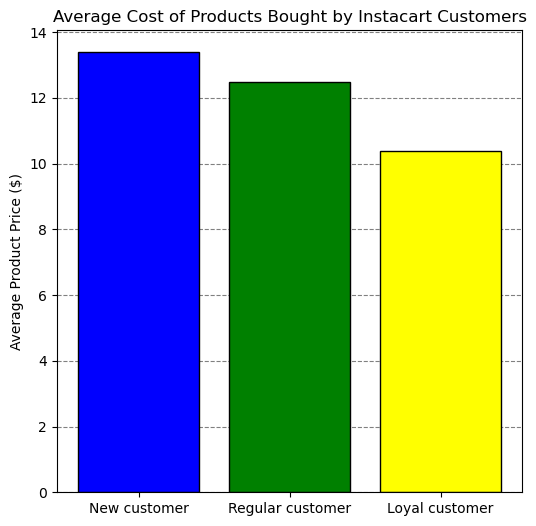

In [187]:
# Set up formatting and colours
plt.figure(figsize=(6, 6))
colors = ['blue', 'green', 'yellow']

# Plot bars
bars = plt.bar(product_avg_cost['loyalty_flag'], product_avg_cost['prices'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Cost of Products Bought by Instacart Customers")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Product Price ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_product_price_by_loyalty.png'), bbox_inches = 'tight')

## Total product orders:

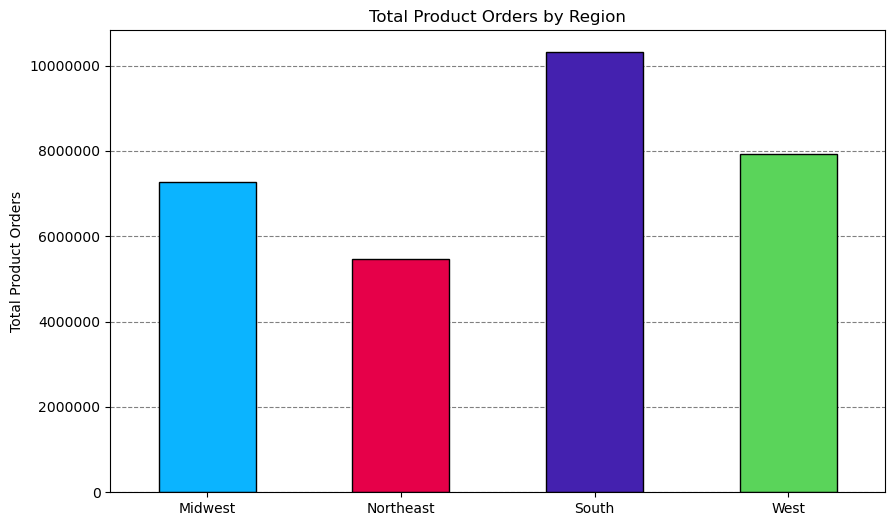

In [189]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
instacart['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_total_orders_by_region.png'), bbox_inches = 'tight')

In [190]:
# Average order_total
region_avg_order_total = orders_subset.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [191]:
# Check
region_avg_order_total

,region,order_total
0,Midwest,128.323108
1,South,122.326654
2,Northeast,116.155277
3,West,113.891103


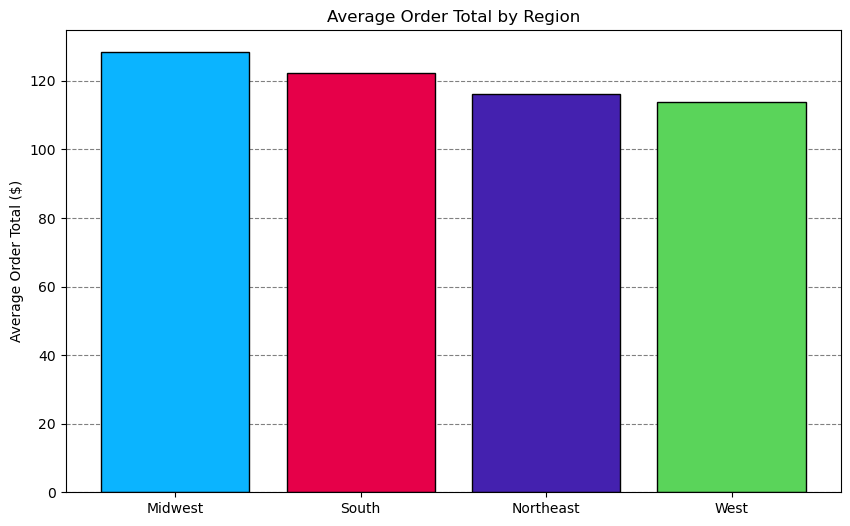

In [192]:
# Set up formatting
# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], 
               region_avg_order_total['order_total'], 
               color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_region.png'), bbox_inches = 'tight')

# Differences in ordering habits of different customer profiles

In [194]:
# Income groups by the mean of the order_total - multilevel index
sorted_df = aggregations_by_income_cat.sort_values(by=('order_total', 'mean'), ascending=False)

In [195]:
# Check
sorted_df

days_since_prior_order                  order_total              \
                                min       mean   max         min        mean   
Income_group                                                                   
High                            0.0  10.260991  30.0         1.0  173.328575   
Middle                          0.0  10.290003  30.0         1.0   87.647632   
Low                             0.0  11.070341  30.0         1.0   52.673028   

                        
                   max  
Income_group            
High          100452.9  
Middle        100264.7  
Low              875.0

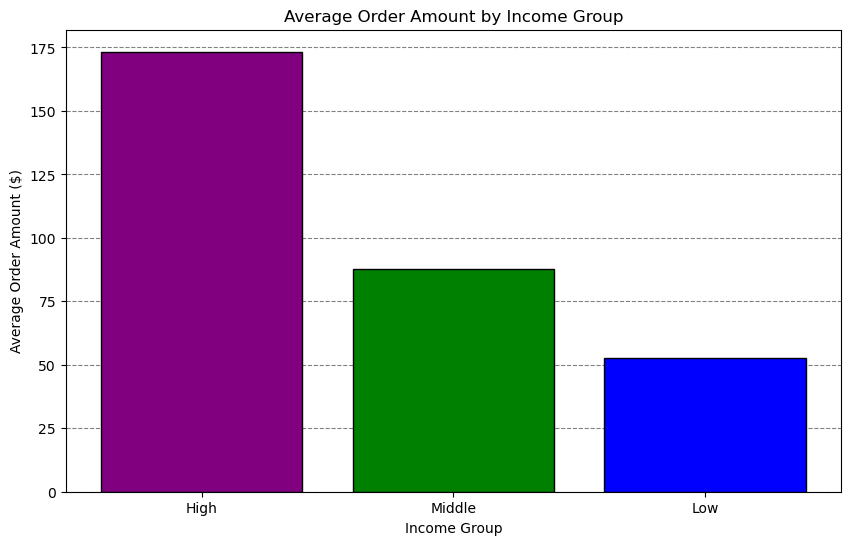

In [196]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['order_total', 'mean'], color=['purple', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

### Creating Frequency_flag, merging it in user_sample and then generating cross-tabulation

In [203]:
# Calculate median_days_between_orders for each user
median_days_between_orders = instacart.groupby('user_id')['days_since_prior_order'].median().reset_index(name='customer_frequency')

# Merge median_days_between_orders with user_sample DataFrame
user_sample = pd.merge(user_sample, median_days_between_orders, on='user_id', how='left')

# Define frequency_flag based on median_days_between_orders
conditions = [
    (user_sample['customer_frequency'] <= 10),
    (user_sample['customer_frequency'] > 10) & (user_sample['customer_frequency'] <= 20),
    (user_sample['customer_frequency'] > 20)
]
choices = ['High', 'Medium', 'Low']

user_sample['frequency_flag'] = pd.cut(user_sample['customer_frequency'], bins=[-float('inf'), 10, 20, float('inf')], labels=['High', 'Medium', 'Low'])

# Generate cross-tabulation
crosstab1 = pd.crosstab(user_sample['Income_group'], user_sample['frequency_flag'], dropna=False)

print(crosstab1)

frequency_flag   High  Medium    Low
Income_group                        
High            33485   21477  15118
Low             10630    7860   6702
Middle          31812   20702  14845


In [204]:
# Check
crosstab1

frequency_flag,High,Medium,Low
Income_group,,,
High,33485,21477,15118
Low,10630,7860,6702
Middle,31812,20702,14845


In [205]:
# Normalise
crosstab1_norm = crosstab1.div(crosstab1.sum(axis=1), axis = 0) * 100
# Check
crosstab1_norm

frequency_flag,High,Medium,Low
Income_group,,,
High,47.781107,30.646404,21.572489
Low,42.195935,31.200381,26.603684
Middle,47.227542,30.733829,22.038629


<Figure size 800x1000 with 0 Axes>

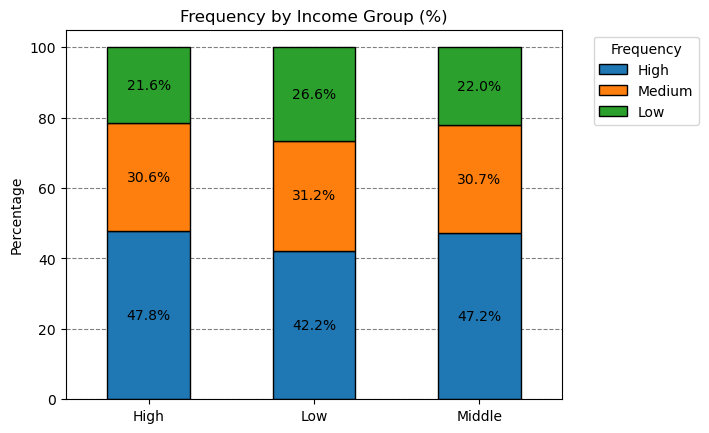

In [208]:
# Graph
plt.figure(figsize=(8, 10)) 
ax = crosstab1_norm.plot(kind='bar', stacked=True, zorder=2, edgecolor='black')

# To show percentages on each section:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'  # Format as percentage
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center')

plt.title('Frequency by Income Group (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.legend(title='Frequency',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_customer_frequency_by_income.png'), bbox_inches = 'tight')

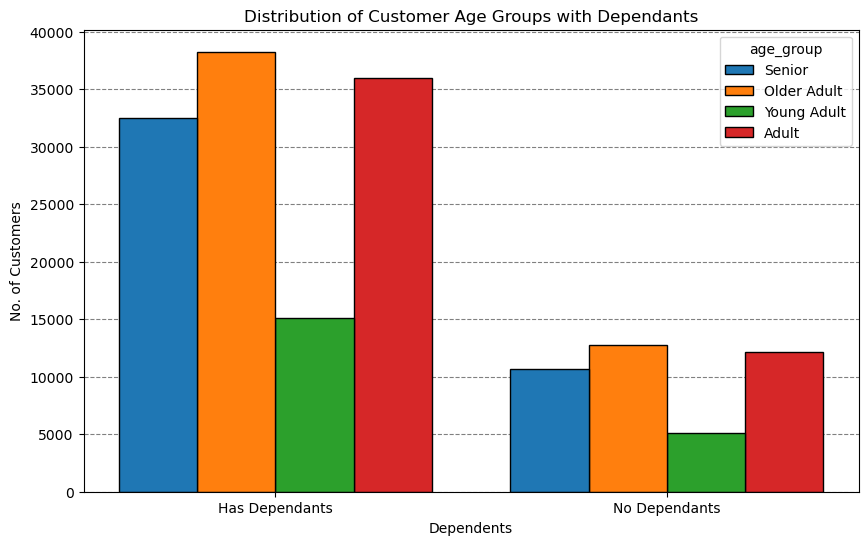

In [211]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='dependants_flag', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups with Dependants')
plt.ylabel('No. of Customers')
plt.xlabel('Dependents')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_dependents.png'), bbox_inches = 'tight')
plt.show()

In [213]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['dependants_flag'], dropna = False)

dependants_flag,Has Dependants,No Dependants
age_group,,
Adult,36000,12191
Older Adult,38270,12723
Senior,32547,10703
Young Adult,15087,5110


C:\Users\shrav\AppData\Local\Temp\ipykernel_4148\3477648777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_parents['group'] = 'Young Parents'
C:\Users\shrav\AppData\Local\Temp\ipykernel_4148\3477648777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_adults['group'] = 'Single Adults'


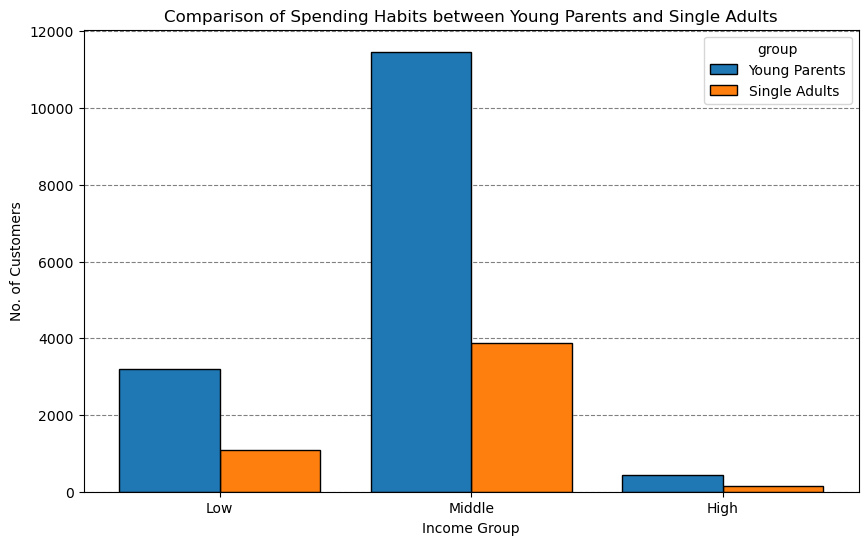

In [219]:
# Filter data for young parents and single adults
young_parents = user_sample[(user_sample['dependants_flag'] == 'Has Dependants') & (user_sample['age_group'] == 'Young Adult')]
single_adults = user_sample[(user_sample['dependants_flag'] == 'No Dependants') & (user_sample['age_group'] == 'Young Adult')]

# Combine filtered data and add a 'group' column
young_parents['group'] = 'Young Parents'
single_adults['group'] = 'Single Adults'
combined_data = pd.concat([young_parents, single_adults])

plt.figure(figsize=(10, 6))
# Plot the histogram bars with group breakdown
sns.histplot(data=combined_data, x='Income_group', hue='group', multiple='dodge', shrink=.8, alpha=1, element='bars', stat='count', common_norm=False)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Comparison of Spending Habits between Young Parents and Single Adults')
plt.ylabel('No. of Customers')
plt.xlabel('Income Group')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'young_parents_vs_single_adults_income_group.png'), bbox_inches='tight')
plt.show()


In [226]:
# Create a pivot table for the crosstab
pivot_table = pd.pivot_table(user_sample,
                             values='user_id',  # Assuming 'user_id' is a unique identifier
                             index=['age_group'],
                             columns=['Income_group', 'frequency_flag'],
                             aggfunc='count',  # Count the occurrences
                             fill_value=0,  # Replace NaN with 0
                             dropna=False)  # Include missing values

# Display the pivot table
pivot_table

C:\Users\shrav\AppData\Local\Temp\ipykernel_4148\3834382876.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(user_sample,


Income_group     High                Low              Middle             
frequency_flag   High Medium   Low  High Medium   Low   High Medium   Low
age_group                                                                
Adult            3757   2353  1559  3873   2936  2468  14859   9594  6792
Older Adult     15824  10182  7354  2661   1966  1737   5216   3460  2593
Senior          13626   8764  6085  2282   1612  1384   4374   2964  2159
Young Adult       278    178   120  1814   1346  1113   7363   4684  3301

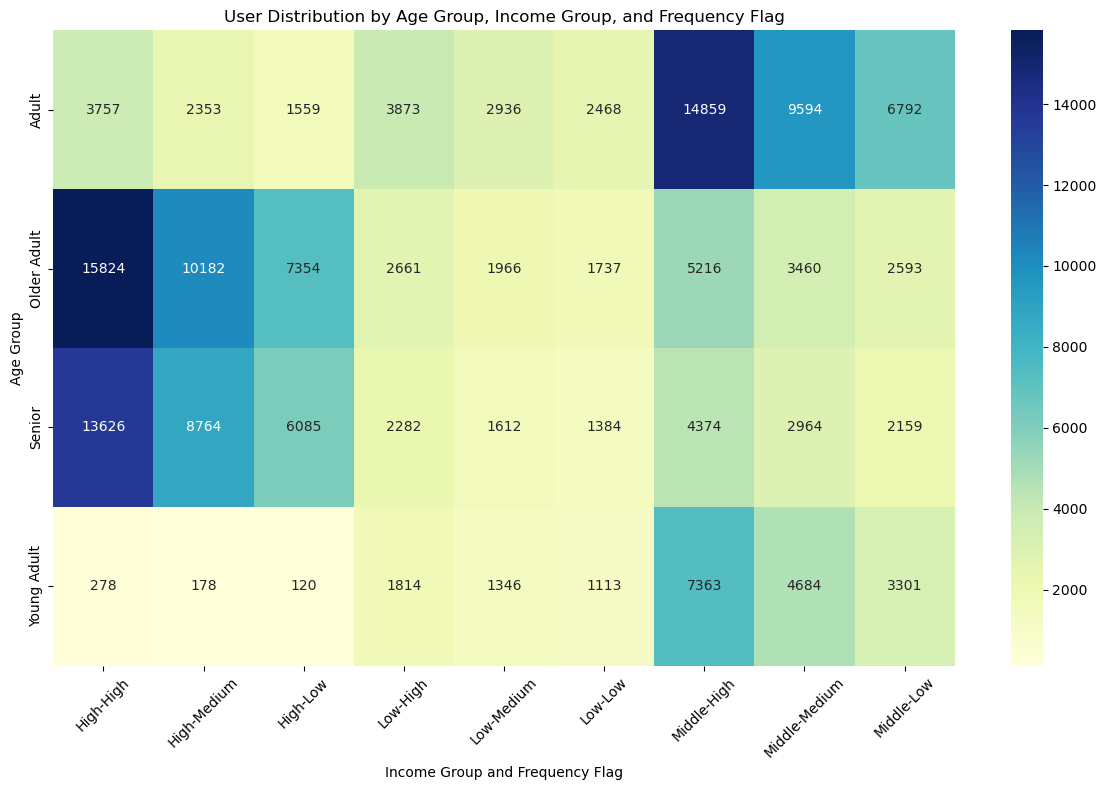

In [227]:
plt.figure(figsize=(12, 8))
# Plot heatmap
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('User Distribution by Age Group, Income Group, and Frequency Flag')
plt.xlabel('Income Group and Frequency Flag')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, 'user_distribution_heatmap.png'), bbox_inches='tight')
plt.show()
